# 先導入所有需要的套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from ipywidgets import interact_manual

# 資料預處理

In [2]:
data_dir = './images'  # 資料夾的路徑
breeds = ['Abyssinian', 'American', 'Silkie', 'Skinny']
images = []
labels = []

for idx, breed in enumerate(breeds):
    breed_dir = os.path.join(data_dir, breed)
    for img_name in os.listdir(breed_dir):
        if not img_name.startswith('.'):  # 排除隱藏檔案
            img_path = os.path.join(breed_dir, img_name)
            img = load_img(img_path, target_size=(128, 128))
            images.append(img_to_array(img))
            labels.append(idx)

# 轉換成 numpy array
x_data = np.array(images, dtype='float32') / 255.  # 正規化
y_data = to_categorical(labels, num_classes=len(breeds))

# 切分資料

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# 隨機查看一筆資料的長相

(1305, 128, 128, 3)


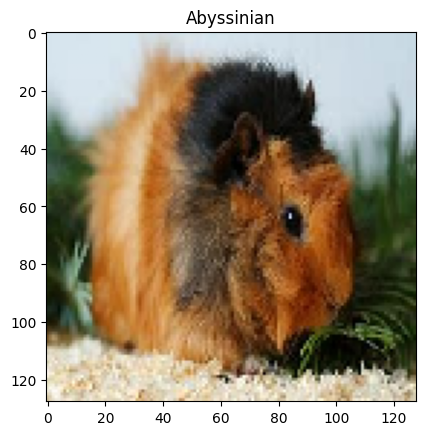

In [4]:
print(x_train.shape)
n = np.random.randint(x_train.shape[0])
plt.imshow(x_train[n], cmap='Greys')
plt.title(breeds[np.argmax(y_train[n])])
plt.show()

# 打造神經網路

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(breeds), activation='softmax')
])

# 組裝神經網路

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

# 查看模型結構

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

# 訓練

In [8]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
41/41 [==============================] - 5s 117ms/step - loss: 1.3395 - accuracy: 0.3379 - val_loss: 1.3185 - val_accuracy: 0.3792
Epoch 2/10
41/41 [==============================] - 5s 111ms/step - loss: 1.3107 - accuracy: 0.3755 - val_loss: 1.2957 - val_accuracy: 0.4006
Epoch 3/10
41/41 [==============================] - 4s 109ms/step - loss: 1.2825 - accuracy: 0.3977 - val_loss: 1.2530 - val_accuracy: 0.4557
Epoch 4/10
41/41 [==============================] - 4s 110ms/step - loss: 1.2583 - accuracy: 0.4192 - val_loss: 1.2604 - val_accuracy: 0.4128
Epoch 5/10
41/41 [==============================] - 4s 105ms/step - loss: 1.2331 - accuracy: 0.4552 - val_loss: 1.2640 - val_accuracy: 0.3761
Epoch 6/10
41/41 [==============================] - 5s 113ms/step - loss: 1.2101 - accuracy: 0.4529 - val_loss: 1.1935 - val_accuracy: 0.4862
Epoch 7/10
41/41 [==============================] - 33s 833ms/step - loss: 1.1786 - accuracy: 0.4720 - val_loss: 1.2476 - val_accuracy: 0.4098
Epoch

# 預測

In [9]:
predictions = model.predict(x_test)

11/11 [==============================] - 0s 28ms/step


# 評估正確率

In [10]:
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.43


# 儲存模型

In [11]:
model.save('./model/guinea_pig_model.h5')

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
